In [7]:
print('klarer man en commit da?')
print('test1')

klarer man en commit da?
test1


In [12]:
import pandas as pd
from pyjstat import pyjstat
import requests
import matplotlib.pyplot as plt

In [3]:
#KPI månedlig fra SSB:
POST_URL = 'https://data.ssb.no/api/v0/no/table/05327/'

In [8]:
payload = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": [
          "JA_TOTAL"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KPIJustIndMnd"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2013M04",
          "2013M05",
          "2013M06",
          "2013M07",
          "2013M08",
          "2013M09",
          "2013M10",
          "2013M11",
          "2013M12",
          "2014M01",
          "2014M02",
          "2014M03",
          "2014M04",
          "2014M05",
          "2014M06",
          "2014M07",
          "2014M08",
          "2014M09",
          "2014M10",
          "2014M11",
          "2014M12",
          "2015M01",
          "2015M02",
          "2015M03",
          "2015M04",
          "2015M05",
          "2015M06",
          "2015M07",
          "2015M08",
          "2015M09",
          "2015M10",
          "2015M11",
          "2015M12",
          "2016M01",
          "2016M02",
          "2016M03",
          "2016M04",
          "2016M05",
          "2016M06",
          "2016M07",
          "2016M08",
          "2016M09",
          "2016M10",
          "2016M11",
          "2016M12",
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12",
          "2020M01",
          "2020M02",
          "2020M03",
          "2020M04",
          "2020M05",
          "2020M06",
          "2020M07",
          "2020M08",
          "2020M09",
          "2020M10",
          "2020M11",
          "2020M12",
          "2021M01",
          "2021M02",
          "2021M03",
          "2021M04",
          "2021M05",
          "2021M06",
          "2021M07",
          "2021M08",
          "2021M09",
          "2021M10",
          "2021M11",
          "2021M12",
          "2022M01",
          "2022M02",
          "2022M03",
          "2022M04",
          "2022M05",
          "2022M06",
          "2022M07",
          "2022M08",
          "2022M09",
          "2022M10",
          "2022M11",
          "2022M12",
          "2023M01",
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [9]:
result = requests.post(POST_URL, json = payload)

In [10]:
dataset = pyjstat.Dataset.read(result.text)
KPI_JA = dataset.write('dataframe')

In [11]:
KPI_JA

,konsumgruppe,statistikkvariabel,måned,value
0,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M04,96.0
1,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M05,96.1
2,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M06,95.7
3,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M07,96.1
4,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2013M08,96.0
...,...,...,...,...
113,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M09,129.5
114,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M10,128.8
115,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M11,128.4
116,KPI-JA Totalindeks,"KPI-JA, KPI-JAE. KPI-JE og KPI-JEL (2015=100) ...",2022M12,129.6


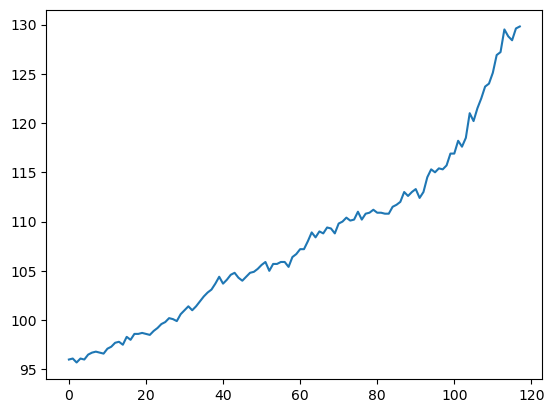

In [17]:
plt.plot(KPI_JA['value'])
plt.savefig('data/KPI_JA.png')
plt.show()